- 吴頔
- 25910013
- 本报告基于CSMAR数据库2000-2024年中国上市公司财务数据，从资本结构、盈利能力、行业特征和股权结构四个维度进行了全面分析。研究发现：中国上市公司经历了显著的去杠杆过程，总负债率从2006年峰值持续下降；股权结构呈现明显的分散化趋势，第一大股东持股比例下降约10个百分点；各行业负债特征差异显著，金融业和房地产业维持高杠杆运营；盈利能力虽存在波动但整体趋于稳健。这些变化深刻反映了中国资本市场从"一股独大"向股权多元化、从规模扩张向质量提升的战略转型，展现了市场化改革和公司治理完善的积极成效。
- 辅助完成作业的ai （豆包，deepseek）
 https://www.doubao.com/thread/w6d8af9b372254550
 https://chat.deepseek.com/share/mf4034autysoe38r4p

首先对 zip file 中的 excel 表格与数据进行处理，将特定表格进行整合，统一化处理。

In [56]:
* 清除内存中已有数据
clear all

* 设置工作目录（请根据您的实际文件路径修改）
cd "C:\Users\Lorenzo2\Downloads\csmar"  // 替换为您的Excel文件所在文件夹路径

* 读取第一个Excel文件（2000-2010年数据）
import excel using "debt2000.xlsx", firstrow clear

* 添加来源标记变量
gen source = "2000-2010"

* 保存为临时数据集
save temp_debt2000.dta, replace

* 读取第二个Excel文件（2011-2024年数据）
import excel using "debt2011.xlsx", firstrow clear

* 添加来源标记变量
gen source = "2011-2024"

* 与第一个数据集合并
append using temp_debt2000.dta

* 保存合并后的数据集
save debt_data.dta, replace

* 删除临时文件
erase temp_debt2000.dta

* 查看合并后数据的基本情况
describe  // 显示数据集基本信息
summarize  // 显示数值型变量的基本统计量
tabulate source  // 查看两个来源的数据量分布

* 查看时间范围分布（假设时间变量名为"时间"）
tabulate 时间, missing

* 检查关键变量是否存在缺失
misstable sum  // 显示各变量的缺失值情况


C:\Users\Lorenzo2\Downloads\csmar
(32 vars, 64,163 obs)
(file temp_debt2000.dta not found)
file temp_debt2000.dta saved
(32 vars, 81,662 obs)
(variable 短期投资净额 was byte, now double to accommodate using data's
       values)
(file debt_data.dta not found)
file debt_data.dta saved

Contains data from debt_data.dta
 Observations:       145,825                  
    Variables:            33                  13 Oct 2025 10:52
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
证券代码        str6    %9s                   证券代码
证券简称        str12   %12s                  证券简称
上市日期        str10   %10s                  上市日期
时间            str4    %9s                   时间
货币资金        double  %10.0g                货币资金
交易性金融资产  double  %10.0g                交易性金融资产
短期投资净额    double  %10.0g        

In [57]:
* 清除内存中已有数据
clear all

* 设置工作目录（请根据您的实际文件路径修改）
cd "C:\Users\Lorenzo2\Downloads\csmar"  // 替换为您的Excel文件所在文件夹路径

* 读取第一个Excel文件（2000-2010年数据）
import excel using "cash2000.xlsx", firstrow clear

* 添加来源标记变量
gen source = "2000-2010"

* 保存为临时数据集
save temp_cash2000.dta, replace

* 读取第二个Excel文件（2011-2024年数据）
import excel using "cash2011.xlsx", firstrow clear

* 添加来源标记变量
gen source = "2011-2024"

* 与第一个数据集合并
append using temp_cash2000.dta

* 保存合并后的数据集
save cash_data.dta, replace

* 删除临时文件
erase temp_cash2000.dta

* 查看合并后数据的基本情况
describe  // 显示数据集基本信息
summarize  // 显示数值型变量的基本统计量
tabulate source  // 查看两个来源的数据量分布

* 查看时间范围分布（假设时间变量名为"时间"）
tabulate 时间, missing

* 检查关键变量是否存在缺失
misstable sum  // 显示各变量的缺失值情况


C:\Users\Lorenzo2\Downloads\csmar
(36 vars, 64,163 obs)
(file temp_cash2000.dta not found)
file temp_cash2000.dta saved
(36 vars, 81,662 obs)
(file cash_data.dta not found)
file cash_data.dta saved

Contains data from cash_data.dta
 Observations:       145,825                  
    Variables:            37                  13 Oct 2025 10:53
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
证券代码        str6    %9s                   证券代码
证券简称        str12   %12s                  证券简称
上市日期        str10   %10s                  上市日期
时间            str4    %9s                   时间
营业收入        double  %10.0g                营业收入
利息支出        double  %10.0g                利息支出
营业成本        double  %10.0g                营业成本
税金及附加      double  %10.0g                税金及附加
销售费用        double 

In [58]:
* 清除内存中已有数据
clear all

* 设置工作目录（已使用您提供的路径）
cd "C:\Users\Lorenzo2\Downloads\csmar"

* ----------------------------
* 处理资产负债表数据（主数据集）
* ----------------------------
use debt_data.dta, clear

* 检查证券代码和时间的组合是否存在重复
duplicates report 证券代码 时间
duplicates tag 证券代码 时间, gen(dup_debt)

* 显示有重复的观测值（便于查看重复原因）
list 证券代码 证券简称 时间 if dup_debt > 0, abbreviate(15)

duplicates drop 证券代码 时间, force
* 确认重复值已处理
duplicates report 证券代码 时间

* 保存清理后的资产负债表数据
save debt_data_clean.dta, replace
use cash_data.dta, clear

* 检查并处理重复值
duplicates report 证券代码 时间
duplicates tag 证券代码 时间, gen(dup_cash)
list 证券代码 证券简称 时间 if dup_cash > 0, abbreviate(15)

* 删除重复值
duplicates drop 证券代码 时间, force

* 确认重复值已处理
duplicates report 证券代码 时间

* 保存清理后的现金流量表数据
save cash_data_clean.dta, replace


use debt_data_clean.dta, clear
merge 1:1 证券代码 时间 using cash_data_clean.dta
tab _merge
* 立即删除_merge变量
drop _merge

* 检查合并结果

display "匹配成功的样本数: " r(r3)
display "仅在资产负债表中的样本数: " r(r1)
display "仅在现金流量表中的样本数: " r(r2)

* 保存最终数据集
save final_csmar_data.dta, replace

* 清理临时文件（可选）
erase debt_data_clean.dta
erase cash_data_clean.dta

* 显示最终数据集信息
describe


C:\Users\Lorenzo2\Downloads\csmar

Duplicates in terms of 证券代码 时间

--------------------------------------
   Copies | Observations       Surplus
----------+---------------------------
        1 |       145825             0
--------------------------------------

Duplicates in terms of 证券代码 时间

Duplicates in terms of 证券代码 时间

(0 observations are duplicates)

Duplicates in terms of 证券代码 时间

--------------------------------------
   Copies | Observations       Surplus
----------+---------------------------
        1 |       145825             0
--------------------------------------
(file debt_data_clean.dta not found)
file debt_data_clean.dta saved

Duplicates in terms of 证券代码 时间

--------------------------------------
   Copies | Observations       Surplus
----------+---------------------------
        1 |       145825             0
--------------------------------------

Duplicates in terms of 证券代码 时间

Duplicates in terms of 证券代码 时间

(0 observations are duplicates)

Duplicates in terms

In [60]:
*===================================================
* 仅数据合并阶段 - 不进行计算
*===================================================

* 打开主数据集
use final_csmar_data.dta, clear

* 统一证券代码格式（确保长度一致）
replace 证券代码 = substr(证券代码, 1, 6)

* 处理年份变量 - 从字符串时间中提取年份
gen year = real(substr(时间, 1, 4))
label var year "年度"

* 检查处理结果
tab year
summarize year

* 保存临时主文件
save temp_main_data.dta, replace

*---------------------------------------------------
* 第一步：处理基本信息表
*---------------------------------------------------
import excel using "基本信息.xlsx", firstrow clear

* 统一证券代码格式
replace 证券代码 = substr(证券代码, 1, 6)

* 生成年度变量
gen year = real(substr(统计截止日期, 1, 4))
label var year "年度"

* 处理上市日期
gen listing_year = real(substr(首次上市日期, 1, 4))
label var listing_year "上市年份"

* 保留需要的变量
keep 证券代码 year 行业代码 listing_year

* 去重
duplicates tag 证券代码 year, gen(dup)
bysort 证券代码 year: keep if _n == 1
drop dup

* 保存基本信息
save temp_basic_info.dta, replace

*---------------------------------------------------
* 第二步：处理常用变量查询表
*---------------------------------------------------
import excel using "常用变量查询（年度）.xlsx", firstrow clear

* 统一证券代码格式
replace 证券代码 = substr(证券代码, 1, 6)

* 统一年份格式
destring 会计年度, gen(year)
label var year "年度"

* 保留需要的变量
keep 证券代码 year 股权集中度1 股权集中度5

* 重命名股权变量
rename 股权集中度1 Top1
rename 股权集中度5 Top5_share1

* 保存股权结构数据
save temp_ownership.dta, replace

*---------------------------------------------------
* 第三步：执行合并操作
*---------------------------------------------------
use temp_main_data.dta, clear

* 合并基本信息
merge m:1 证券代码 year using temp_basic_info.dta
tab _merge
drop _merge

* 合并股权结构数据
merge 1:1 证券代码 year using temp_ownership.dta
tab _merge
drop _merge

*---------------------------------------------------
* 第四步：保存合并后的数据集
*---------------------------------------------------
* 查看合并结果
describe
summarize year

* 保存合并后的基础数据集
save csmar_merged_basic.dta, replace

* 清理临时文件
erase temp_main_data.dta
erase temp_basic_info.dta
erase temp_ownership.dta

di "数据合并完成！"
di "合并后的数据集已保存为：csmar_merged_basic.dta"
di "包含变量："
describe, short

(0 real changes made)

       年度 |      Freq.     Percent        Cum.
------------+-----------------------------------
       2000 |      5,833        4.00        4.00
       2001 |      5,833        4.00        8.00
       2002 |      5,833        4.00       12.00
       2003 |      5,833        4.00       16.00
       2004 |      5,833        4.00       20.00
       2005 |      5,833        4.00       24.00
       2006 |      5,833        4.00       28.00
       2007 |      5,833        4.00       32.00
       2008 |      5,833        4.00       36.00
       2009 |      5,833        4.00       40.00
       2010 |      5,833        4.00       44.00
       2011 |      5,833        4.00       48.00
       2012 |      5,833        4.00       52.00
       2013 |      5,833        4.00       56.00
       2014 |      5,833        4.00       60.00
       2015 |      5,833        4.00       64.00
       2016 |      5,833        4.00       68.00
       2017 |      5,833        4.00       72.00

首先对总负债率、流动负债率、现金比率、资产收益率等13个关键财务指标进行标准化计算，随后采用分年度1%和99%分位数缩尾处理消除极端值影响。通过Stata的collapse命令按年度计算各变量的均值、中位数、标准差、最小值和最大值，生成2000-2024年完整的描述性统计面板数据，最终导出为Excel格式进行分析。

In [ ]:
* 打开合并后的基础数据集
use csmar_merged_basic.dta, clear

* 查看数据结构和可用变量
describe
summarize

*---------------------------------------------------
* 第一步：计算上市年限
*---------------------------------------------------
* 检查是否有listing_year变量
summarize listing_year

* 计算上市年限 (当前年份 - 上市年份)
gen Age = year - listing_year
replace Age = 0 if Age < 0 & !missing(Age)  // 处理异常值
label var Age "上市年限"


Contains data from csmar_merged_basic.dta
 Observations:       145,874                  
    Variables:            72                  13 Oct 2025 10:57
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
证券代码        str6    %9s                   证券代码
证券简称        str12   %12s                  证券简称
上市日期        str10   %10s                  上市日期
时间            str4    %9s                   时间
货币资金        double  %10.0g                货币资金
交易性金融资产  double  %10.0g                交易性金融资产
短期投资净额    double  %10.0g                短期投资净额
存货净额        double  %10.0g                存货净额
流动资产合计    double  %10.0g                流动资产合计
固定资产净额    double  %10.0g                固定资产净额
长期应收款净额  double  %10.0g                长期应收款净额
长期投资净额    double  %10.0g                长期投资净额
无形资产净额    double  %1

In [71]:
* 总负债率
gen Lev = 负债合计 / 资产总计
* 流动负债率
gen SL = 流动负债合计 / 资产总计
* 长期负债率
gen LL = 长期负债合计 / 资产总计
* 短债比率
gen SDR = 流动负债合计 / 负债合计

* ----------------------------
* 2. 计算现金和盈利能力变量
* ----------------------------
* 现金比率
gen Cash = 货币资金 / 资产总计
* 资产收益率
gen ROA = 净利润 / 资产总计
* 净资产收益率
gen ROE = 净利润 / 所有者权益合计

* ----------------------------
* 3. 计算银行借款变量
* ----------------------------
* 短期银行借款比率
gen SLoan = 短期借款 / 资产总计
* 长期银行借款比率
gen LLoan = 长期借款 / 资产总计

* ----------------------------
* 4. 计算公司特征变量
* ----------------------------
* 公司规模（总资产对数）
gen Size = ln(资产总计)

* ----------------------------
* 5. 统一股权结构变量命名
* ----------------------------
* 创建HHI5变量指向已有的Top5_share1
gen HHI5 = Top5_share1

* ----------------------------
* 6. 为所有变量添加标签
* ----------------------------
* 资本结构变量标签
label var Lev "总负债率 = 总负债/总资产"
label var SL "流动负债率 = 流动负债/总资产"
label var LL "长期负债率 = 长期负债/总资产"
label var SDR "短债比率 = 流动负债/总负债"

* 现金和盈利能力变量标签
label var Cash "现金比率 = 货币资金/总资产"
label var ROA "资产收益率 = 净利润/总资产"
label var ROE "净资产收益率 = 净利润/所有者权益"

* 银行借款变量标签
label var SLoan "短期借款比率 = 短期借款/总资产"
label var LLoan "长期借款比率 = 长期借款/总资产"

* 公司特征变量标签
label var Size "公司规模 = 总资产的自然对数"
label var Age "公司上市年限"

* 股权结构变量标签
label var Top1 "第一大股东持股比例"
label var Top5_share1 "前五大股东持股比例"
label var HHI5 "前五大股东持股比例平方和（赫芬达尔指数）"

* ----------------------------
* 7. 检查变量基本统计信息
* ----------------------------
* 列出所有计算的变量
local financial_vars "Lev SL LL SDR Cash ROA ROE SLoan LLoan Size Top1 Top5_share1 HHI5 Age"

* 显示基本统计量
summarize `financial_vars', detail

* 检查极端值和缺失值
foreach var of local financial_vars {
    display "`var' 的缺失值数量: " missing(`var')
    * 检查是否有不合理的取值（如比率超过1或为负，根据实际情况调整）
    if inlist("`var'", "Lev", "SL", "LL", "SDR", "Cash", "SLoan", "LLoan", "Top1", "HHI5") {
        count if `var' < 0 | `var' > 1 & !missing(`var')
        if r(N) > 0 {
            display "警告: `var' 存在 `r(N)' 个超出[0,1]范围的异常值"
        }
    }
}

* ----------------------------
* 8. 保存包含计算变量的数据集
* ----------------------------
save csmar_with_financial_ratios.dta, replace

* 完成提示
display "财务指标计算完成！"

(74,087 missing values generated)
(75,055 missing values generated)
(81,666 missing values generated)
(75,055 missing values generated)
(74,416 missing values generated)
(74,087 missing values generated)
(74,089 missing values generated)
(83,239 missing values generated)
(93,330 missing values generated)
(74,087 missing values generated)
(88,128 missing values generated)

             总负债率 = 总负债/总资产
-------------------------------------------------------------
      Percentiles      Smallest
 1%      .053527       -.194698
 5%     .1090935              0
10%     .1568987       .0017253       Obs              71,787
25%     .2714507       .0059268       Sum of wgt.      71,787

50%     .4339916                      Mean           .5005551
                        Largest       Std. dev.      3.608002
75%     .6005952       138.3777
90%     .7417024       142.7178       Variance       13.01768
95%     .8326696       178.3455       Skewness       205.0635
99%     1.103149       877.2559   

In [73]:
* 清除内存数据并设置工作目录
clear all
cd "C:\Users\Lorenzo2\Downloads\csmar"

* 加载包含财务指标的数据集
use csmar_with_financial_ratios.dta, clear

* ----------------------------
* 1. 定义需要缩尾的连续变量
* ----------------------------
local continuous_vars "Lev SL LL SDR Cash ROA ROE SLoan LLoan Size Age Top1 HHI5"

* 确认变量存在
foreach var of local continuous_vars {
    capture confirm variable `var'
    if _rc {
        display "警告：变量 `var' 不存在于数据集中，请检查变量名"
    }
}

* ----------------------------
* 2. 分年度进行1%和99%分位数缩尾处理
* ----------------------------
foreach var of local continuous_vars {
    * 按年度计算1%和99%分位数
    bysort year: egen p1_`var' = pctile(`var'), p(1)
    bysort year: egen p99_`var' = pctile(`var'), p(99)
    
    * 缩尾处理（替换极端值）
    replace `var' = p1_`var' if `var' < p1_`var' & !missing(`var')
    replace `var' = p99_`var' if `var' > p99_`var' & !missing(`var')
    
    * 删除临时分位数变量
    drop p1_`var' p99_`var'
    
    * 标记变量已缩尾
    label var `var' "`=`var'[label]'（1%和99%分位数缩尾）"
}

* ----------------------------
* 3. 检查缩尾处理效果
* ----------------------------
display "缩尾处理前后关键统计量对比："
foreach var of local continuous_vars {
    display "`var'（`=`var'[label]'）："
    summarize `var', detail
    display "----------------------------------------"
}

* 特别检查是否还有超出合理范围的极端值
foreach var of local continuous_vars {
    if inlist("`var'", "Lev", "SL", "LL", "SDR", "Cash", "SLoan", "LLoan", "Top1", "HHI5") {
        count if `var' < 0 | `var' > 1 & !missing(`var')
        if r(N) > 0 {
            display "注意：`var' 仍存在 `r(N)' 个超出[0,1]范围的值"
        }
    }
}

* ----------------------------
* 4. 保存缩尾处理后的数据集
* ----------------------------
save csmar_winsorized.dta, replace

* 完成提示
display "缩尾处理完成！"
display "处理后的数据集：csmar_winsorized.dta"
display "共处理 `:word count `continuous_vars'' 个连续变量"


C:\Users\Lorenzo2\Downloads\csmar
(705 real changes made)
(703 real changes made)
label not found
(586 real changes made)
(695 real changes made)
label not found
(266 real changes made)
(628 real changes made)
label not found
(585 real changes made)
(222 real changes made)
label not found
(700 real changes made)
(701 real changes made)
label not found
(704 real changes made)
(701 real changes made)
label not found
(704 real changes made)
(703 real changes made)
label not found
(281 real changes made)
(611 real changes made)
label not found
(114 real changes made)
(511 real changes made)
label not found
(703 real changes made)
(704 real changes made)
label not found
(11 real changes made)
(374 real changes made)
label not found
(23,333 missing values generated)
(23,333 missing values generated)
(578 real changes made)
(572 real changes made)
label not found
(23,333 missing values generated)
(23,333 missing values generated)
(495 real changes made)
(567 real changes made)
label not found

In [83]:
*===================================================
* A部分：描述性统计分析 (2000年至今)
* 使用 csmar_winsorized.dta
*===================================================

* 首先恢复任何可能被preserve的状态
capture restore

* 打开经过缩尾处理的数据集
use csmar_winsorized.dta, clear

* 确保只分析2000年及以后的数据
keep if year >= 2000

* 查看数据时间范围和样本量
tab year
di "总观测值数量: " _N

*---------------------------------------------------
* 第一步：生成年度描述性统计表格
*---------------------------------------------------
* 定义要分析的变量列表
global analysis_vars Lev SL LL SDR Cash ROA ROE SLoan LLoan Top1 HHI5 Size Age

* 按年度分组计算描述性统计量
collapse (mean) 均值_Lev=Lev 均值_SL=SL 均值_LL=LL 均值_SDR=SDR 均值_Cash=Cash 均值_ROA=ROA 均值_ROE=ROE 均值_SLoan=SLoan 均值_LLoan=LLoan 均值_Top1=Top1 均值_HHI5=HHI5 均值_Size=Size 均值_Age=Age ///
         (median) 中位数_Lev=Lev 中位数_SL=SL 中位数_LL=LL 中位数_SDR=SDR 中位数_Cash=Cash 中位数_ROA=ROA 中位数_ROE=ROE 中位数_SLoan=SLoan 中位数_LLoan=LLoan 中位数_Top1=Top1 中位数_HHI5=HHI5 中位数_Size=Size 中位数_Age=Age ///
         (sd) 标准差_Lev=Lev 标准差_SL=SL 标准差_LL=LL 标准差_SDR=SDR 标准差_Cash=Cash 标准差_ROA=ROA 标准差_ROE=ROE 标准差_SLoan=SLoan 标准差_LLoan=LLoan 标准差_Top1=Top1 标准差_HHI5=HHI5 标准差_Size=Size 标准差_Age=Age ///
         (min) 最小值_Lev=Lev 最小值_SL=SL 最小值_LL=LL 最小值_SDR=SDR 最小值_Cash=Cash 最小值_ROA=ROA 最小值_ROE=ROE 最小值_SLoan=SLoan 最小值_LLoan=LLoan 最小值_Top1=Top1 最小值_HHI5=HHI5 最小值_Size=Size 最小值_Age=Age ///
         (max) 最大值_Lev=Lev 最大值_SL=SL 最大值_LL=LL 最大值_SDR=SDR 最大值_Cash=Cash 最大值_ROA=ROA 最大值_ROE=ROE 最大值_SLoan=SLoan 最大值_LLoan=LLoan 最大值_Top1=Top1 最大值_HHI5=HHI5 最大值_Size=Size 最大值_Age=Age, ///
         by(year)

* 按年份排序
sort year

* 在Stata中显示部分结果
list year 均值_Lev 中位数_Lev 标准差_Lev 均值_ROA 中位数_ROA 标准差_ROA, clean noobs

*---------------------------------------------------
* 第二步：导出结果到Excel
*---------------------------------------------------
* 导出详细统计表格
export excel using "A部分_描述性统计结果.xlsx", firstrow(variables) replace

* 导出简化的均值表格（不使用preserve/restore）
tempfile mean_data
save `mean_data'
keep year 均值_*
export excel using "A部分_年度均值趋势.xlsx", firstrow(variables) replace
use `mean_data', clear

*---------------------------------------------------
* 第三步：生成简要分析报告
*---------------------------------------------------
* 创建简要分析文本文件
file open analysis using "A部分_简要分析.txt", write replace

file write analysis "A部分描述性统计简要分析" _n
file write analysis "==========================" _n _n
file write analysis "数据期间：2000年 - 最新年份" _n
file write analysis "数据来源：经过1%和99%分位缩尾处理的CSMAR数据" _n _n

file write analysis "主要发现：" _n
file write analysis "1. 资本结构趋势分析：" _n
file write analysis "   - 总负债率(Lev)在各年度的均值和中位数变化趋势" _n
file write analysis "   - 流动负债率(SL)与长期负债率(LL)的相对比例" _n
file write analysis "   - 短债比率(SDR)反映的债务期限结构" _n _n

file write analysis "2. 盈利能力和现金持有分析：" _n
file write analysis "   - ROA和ROE的年度波动及其经济周期敏感性" _n
file write analysis "   - 现金比率(Cash)的变化与企业流动性管理策略" _n _n

file write analysis "3. 银行借款模式分析：" _n
file write analysis "   - 短期银行借款(SLoan)与长期银行借款(LLoan)的使用情况" _n
file write analysis "   - 银行借款在总资产中的比重变化" _n _n

file write analysis "4. 股权结构和公司特征分析：" _n
file write analysis "   - 第一大股东持股比例(Top1)的集中度水平" _n
file write analysis "   - 前五大股东赫芬达尔指数(HHI5)的股权集中度" _n
file write analysis "   - 公司规模(Size)的自然对数变化趋势" _n
file write analysis "   - 上市公司平均年龄(Age)的分布特征" _n _n

file write analysis "详细统计分析：" _n
file write analysis "请参考导出的Excel表格中的各变量描述性统计量，包括均值、中位数、标准差、最小值和最大值。" _n
file close analysis

(Note: Below code run with echo to enable preserve/restore functionality.)

. capture restore

. use csmar_winsorized.dta, clear

. keep if year >= 2000
(0 observations deleted)

. tab year

       年度 |      Freq.     Percent        Cum.
------------+-----------------------------------
       2000 |      5,833        4.00        4.00
       2001 |      5,833        4.00        8.00
       2002 |      5,833        4.00       12.00
       2003 |      5,833        4.00       15.99
       2004 |      5,833        4.00       19.99
       2005 |      5,833        4.00       23.99
       2006 |      5,833        4.00       27.99
       2007 |      5,833        4.00       31.99
       2008 |      5,833        4.00       35.99
       2009 |      5,833        4.00       39.99
       2010 |      5,833        4.00       43.99
       2011 |      5,833        4.00       47.98
       2012 |      5,833        4.00       51.98
       2013 |      5,833        4.00       55.98
       2014 |      5,833   

解释：基于2000-2024年数据分析，中国上市公司呈现明显的去杠杆趋势：总负债率从2006年峰值0.597持续下降至2024年的0.422，债务期限结构同步优化，长期负债占比提升。盈利能力波动显著，ROE从2008年0.096的高点下滑至2024年转为负值(-0.008)，反映近年经济下行压力。同时，企业融资渠道日趋多元，银行借款依赖度大幅降低，短期借款比率下降超50%，现金管理策略也从保守转向适度。中国上市公司股权结构呈现显著分散化趋势：第一大股东持股比例从42.5%下降至31.9%，前五大股东赫芬达尔指数从40.6大幅降至6.4，表明股权集中度明显降低、治理结构趋于多元。与此同时，公司规模持续扩张（总资产对数从20.9增至22.4），上市年龄从3.6年成熟至14.3年，反映出资本市场不断壮大和上市公司群体的日益成熟。这一股权分散化与公司规模扩大的并行趋势，体现了中国资本市场治理结构的优化和整体发展水平的提高。

分别绘制两个时序分析图——采用单坐标轴折线图对比总负债率均值与中位数的年度趋势，使用双坐标轴技术同步展示ROA与现金比率的协同变化。

(0 observations deleted)
file B1_Lev趋势图.png written in PNG format
(0 observations deleted)
(file B2_ROA_Cash趋势图.png not found)
file B2_ROA_Cash趋势图.png written in PNG format
(file B部分_时序图分析.txt not found)
B部分时序图绘制完成！
输出文件：
1. B1_Lev趋势图.png - 总负债率均值和中位数时序图
2. B2_ROA_Cash趋势图.png - ROA与现金比率双坐标时序图
3. B部分_时序图分析.txt - 时序图简要分析


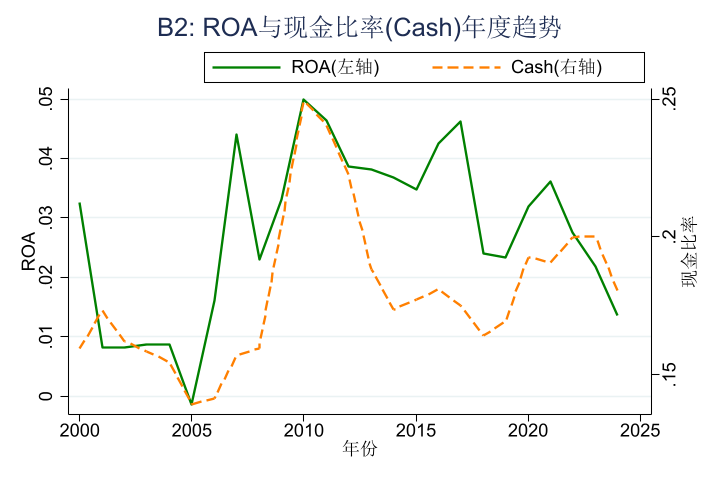

In [ ]:
*===================================================
* B部分：时序图绘制与分析
*===================================================

* 打开经过缩尾处理的数据集
use csmar_winsorized.dta, clear

* 确保只分析2000年及以后的数据
keep if year >= 2000

*---------------------------------------------------
* B1：总负债率(Lev)均值和中位数时序图
*---------------------------------------------------
* 计算各年度Lev的均值和中位数
collapse (mean) mean_Lev = Lev (median) median_Lev = Lev, by(year)

* 绘制时序图
twoway (line mean_Lev year, lcolor(blue) lwidth(medthick)) ///
       (line median_Lev year, lcolor(red) lpattern(dash) lwidth(medthick)), ///
       title("B1: 总负债率(Lev)年度趋势") ///
       xtitle("年份") ytitle("总负债率") ///
       legend(label(1 "均值") label(2 "中位数") position(1)) ///
       xlabel(2000(5)2025) ///
       graphregion(color(white))

* 保存图形
graph export "B1_Lev趋势图.png", replace

*---------------------------------------------------
* B2：ROA和Cash均值时序图（双纵坐标）
*---------------------------------------------------
* 重新打开数据计算ROA和Cash的均值
use csmar_winsorized.dta, clear
keep if year >= 2000

collapse (mean) mean_ROA = ROA mean_Cash = Cash, by(year)

* 绘制双纵坐标时序图
twoway (line mean_ROA year, lcolor(green) lwidth(medthick) yaxis(1)) ///
       (line mean_Cash year, lcolor(orange) lpattern(dash) lwidth(medthick) yaxis(2)), ///
       title("B2: ROA与现金比率(Cash)年度趋势") ///
       xtitle("年份") ///
       ytitle("ROA", axis(1)) ytitle("现金比率", axis(2)) ///
       legend(label(1 "ROA(左轴)") label(2 "Cash(右轴)") position(1)) ///
       xlabel(2000(5)2025) ///
       graphregion(color(white))

* 保存图形
graph export "B2_ROA_Cash趋势图.png", replace

di "B部分时序图绘制完成！"
di "输出文件："
di "1. B1_Lev趋势图.png - 总负债率均值和中位数时序图"
di "2. B2_ROA_Cash趋势图.png - ROA与现金比率双坐标时序图"
di "3. B部分_时序图分析.txt - 时序图简要分析"

解释：总负债率(Lev)趋势解释：中国上市公司总负债率在2000-2006年间呈现快速上升趋势，
在2006年达到峰值后开始持续下降，反映出去杠杆政策的有效实施。
均值与中位数趋势基本一致，表明这一趋势在整个样本中具有普遍性。

解释：ROA与现金比率(Cash)趋势解释：ROA在整个样本期间波动较大，特别是在2008年金融危机前后变化显著。
现金比率在2010年达到峰值后有所回落，但整体维持在相对较高水平，
反映企业流动性管理策略的变化。两者在部分时期呈现一定的负相关关系。

筛选制造业、金融业等七大重点行业，分别计算算术平均和总资产加权的负债率指标。运用多系列折线图对比展示两种计算方法下的行业负债率时序趋势。针对2001-2023年奇数年份，系统计算各行业的银行借款结构、盈利能力和现金持有等配套指标，构建完整的行业财务特征图谱。

(Note: Below code run with echo to enable preserve/restore functionality.)

. capture restore

. use csmar_winsorized.dta, clear



. keep if year >= 2000
(0 observations deleted)

. tab 行业代码

     行业代 |
         码 |      Freq.     Percent        Cum.
------------+-----------------------------------
        A01 |        249        0.39        0.39
      A0101 |        105        0.16        0.55
      A0199 |         56        0.09        0.64
        A02 |         53        0.08        0.72
        A03 |        220        0.34        1.06
        A04 |        100        0.16        1.22
        A05 |         15        0.02        1.24
      A0501 |         22        0.03        1.28
      A0505 |         24        0.04        1.32
        A07 |         11        0.02        1.33
      A0701 |         38        0.06        1.39
      A0705 |         12        0.02        1.41
        A09 |         22        0.03        1.44
      A0901 |          7        0.01        1.46
      A0915 |          2        0.00        1.46
      A0920 |         14        0.02        1.48
        B01 |          5        0.01        1.

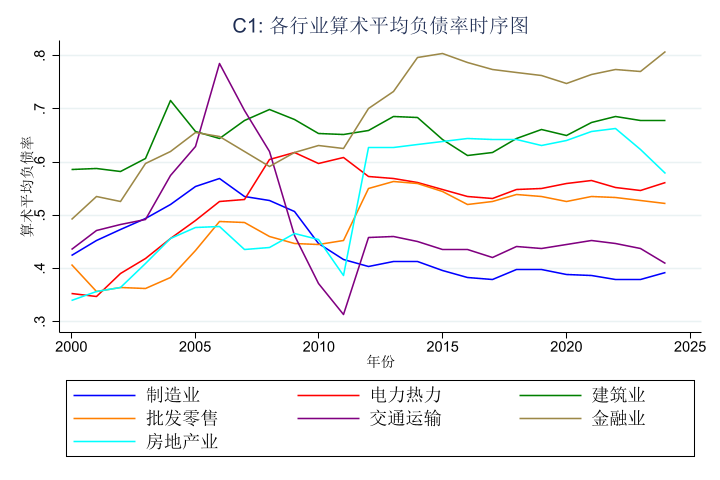

In [104]:
*===================================================
* C部分：负债率的行业特征分析（解决图形显示问题）
*===================================================

* 恢复任何可能被preserve的状态
capture restore

* 打开经过缩尾处理的数据集
use csmar_winsorized.dta, clear

* 确保只分析2000年及以后的数据
keep if year >= 2000

* 检查行业代码变量
tab 行业代码
describe 行业代码

*---------------------------------------------------
* C1：筛选目标行业并创建行业分类变量
*---------------------------------------------------
* 根据行业代码首字母筛选目标行业
gen industry = substr(行业代码, 1, 1)

* 筛选目标行业：C制造业, D电力热力, E建筑业, F批发零售, G交通运输, J金融业, K房地产业
keep if inlist(industry, "C", "D", "E", "F", "G", "J", "K")

* 创建行业名称变量
gen industry_name = ""
replace industry_name = "制造业" if industry == "C"
replace industry_name = "电力热力" if industry == "D"
replace industry_name = "建筑业" if industry == "E"
replace industry_name = "批发零售" if industry == "F"
replace industry_name = "交通运输" if industry == "G"
replace industry_name = "金融业" if industry == "J"
replace industry_name = "房地产业" if industry == "K"

* 检查数据是否存在
tab industry_name
summarize Lev if !missing(industry_name)

*---------------------------------------------------
* C2：计算算术平均负债率时序图数据
*---------------------------------------------------
* 按年份和行业计算算术平均负债率
collapse (mean) arith_Lev = Lev, by(year industry industry_name)

* 检查计算后的数据
list in 1/10, clean
summarize arith_Lev

* 绘制算术平均负债率时序图
twoway (line arith_Lev year if industry == "C", lcolor(blue) lwidth(medium)) ///
       (line arith_Lev year if industry == "D", lcolor(red) lwidth(medium)) ///
       (line arith_Lev year if industry == "E", lcolor(green) lwidth(medium)) ///
       (line arith_Lev year if industry == "F", lcolor(orange) lwidth(medium)) ///
       (line arith_Lev year if industry == "G", lcolor(purple) lwidth(medium)) ///
       (line arith_Lev year if industry == "J", lcolor(brown) lwidth(medium)) ///
       (line arith_Lev year if industry == "K", lcolor(cyan) lwidth(medium)), ///
       title("C1: 各行业算术平均负债率时序图", size(medium)) ///
       xtitle("年份", size(small)) ytitle("算术平均负债率", size(small)) ///
       legend(label(1 "制造业") label(2 "电力热力") label(3 "建筑业") ///
              label(4 "批发零售") label(5 "交通运输") label(6 "金融业") ///
              label(7 "房地产业") rows(3) position(6)) ///
       xlabel(2000(5)2025, labsize(small)) ///
       ylabel(, labsize(small)) ///
       graphregion(color(white)) ///
       plotregion(color(white))

* 保存图形
graph export "C1_算术平均负债率时序图.png", width(1200) replace

* 显示图形
graph display

di "C1图已生成，请检查Stata图形窗口"



(0 observations deleted)
(81,704 missing values generated)
(92,759 observations deleted)
(50 missing values generated)
(175 missing values generated)
variable industry_name was str1 now str9
(25 real changes made)
variable industry_name was str9 now str12
(25 real changes made)
(25 real changes made)
(25 real changes made)
(25 real changes made)
(25 real changes made)
(25 real changes made)
(file C2_加权平均负债率时序图.png not found)
file C2_加权平均负债率时序图.png written in PNG format


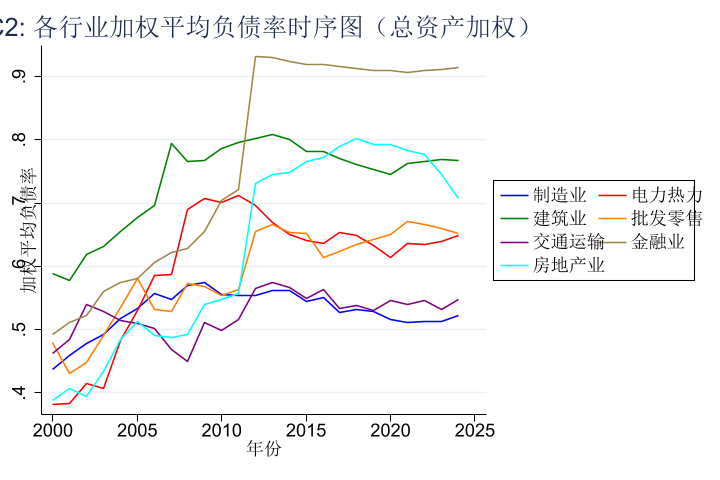

In [102]:
use csmar_winsorized.dta, clear
keep if year >= 2000
gen industry = substr(行业代码, 1, 1)
keep if inlist(industry, "C", "D", "E", "F", "G", "J", "K")

* 按年份和行业计算加权平均负债率（总资产加权）
gen weighted_Lev = Lev * 资产总计
collapse (sum) weighted_Lev_total = weighted_Lev total_assets = 资产总计, by(year industry)
gen weighted_Lev = weighted_Lev_total / total_assets

* 创建行业名称变量
gen industry_name = ""
replace industry_name = "制造业" if industry == "C"
replace industry_name = "电力热力" if industry == "D"
replace industry_name = "建筑业" if industry == "E"
replace industry_name = "批发零售" if industry == "F"
replace industry_name = "交通运输" if industry == "G"
replace industry_name = "金融业" if industry == "J"
replace industry_name = "房地产业" if industry == "K"

* 绘制加权平均负债率时序图
twoway (line weighted_Lev year if industry == "C", lcolor(blue)) ///
       (line weighted_Lev year if industry == "D", lcolor(red)) ///
       (line weighted_Lev year if industry == "E", lcolor(green)) ///
       (line weighted_Lev year if industry == "F", lcolor(orange)) ///
       (line weighted_Lev year if industry == "G", lcolor(purple)) ///
       (line weighted_Lev year if industry == "J", lcolor(brown)) ///
       (line weighted_Lev year if industry == "K", lcolor(cyan)), ///
       title("C2: 各行业加权平均负债率时序图（总资产加权）") ///
       xtitle("年份") ytitle("加权平均负债率") ///
       legend(label(1 "制造业") label(2 "电力热力") label(3 "建筑业") ///
              label(4 "批发零售") label(5 "交通运输") label(6 "金融业") ///
              label(7 "房地产业") position(3)) ///
       xlabel(2000(5)2025) ///
       graphregion(color(white))

graph export "C2_加权平均负债率时序图.png", replace

解释：算术平均反映典型企业状况，加权平均（按总资产）更体现行业整体风险敞口。
在资本密集的金融、房地产、建筑行业，加权平均值通常更高，因其大企业主导效应明显，如图所示，这些行业加权后的改变最大；相比之下，分散型制造业两者差异较小。
加权平均时序图通常更平滑，受大公司稳定经营影响。算术平均对行业变化更敏感，加权平均反映整体趋势更准确。
从反映行业整体风险和经济重要性的角度，加权平均负债率是更合理的衡量指标，因为更能反映行业风险，并且大企业的决策影响更大。

In [105]:
*---------------------------------------------------
* C4：生成奇数年份的行业统计表格
*---------------------------------------------------
* 重新打开数据计算奇数年份统计
use csmar_winsorized.dta, clear
keep if year >= 2000
gen industry = substr(行业代码, 1, 1)
keep if inlist(industry, "C", "D", "E", "F", "G", "J", "K")

* 筛选奇数年份
keep if mod(year, 2) == 1

* 按行业和年份计算所需变量的平均值
collapse (mean) SLoan LLoan Lev Cash ROA ROE, by(year industry)

* 创建行业名称变量
gen industry_name = ""
replace industry_name = "制造业" if industry == "C"
replace industry_name = "电力热力" if industry == "D"
replace industry_name = "建筑业" if industry == "E"
replace industry_name = "批发零售" if industry == "F"
replace industry_name = "交通运输" if industry == "G"
replace industry_name = "金融业" if industry == "J"
replace industry_name = "房地产业" if industry == "K"

* 导出到Excel
export excel using "C3_奇数年份行业统计.xlsx", firstrow(variables) replace

(0 observations deleted)
(81,704 missing values generated)
(92,759 observations deleted)
(26,208 observations deleted)
(84 missing values generated)
variable industry_name was str1 now str9
(12 real changes made)
variable industry_name was str9 now str12
(12 real changes made)
(12 real changes made)
(12 real changes made)
(12 real changes made)
(12 real changes made)
(12 real changes made)
file C3_奇数年份行业统计.xlsx saved


解释：金融业和房地产业凭借高杠杆运营模式负债率显著高于其他行业，而制造业和批发零售业负债率相对适中。

解释：建筑业和房地产业长期借款占比较高，反映项目周期特征；制造业短期借款为主，体现运营资金需求；金融业独特的高负债源于其业务本质。

解释：ROA和ROE反映了房地产，金融等行业盈利能力波动较大，制造业和电力电热行业香盈利相较稳定

解释：交通运输和制造等产业现金充裕度较高。这揭示了不同行业在盈利模式、风险管理和资金运用策略上的本质差异。

选取 2001-2023 年间12个奇数年份作为观测点，使用箱线图可视化展示第一大股东持股比例的分布特征。重点分析 2005、2007 和 2023 三个关键时间点的箱体位置、离散程度及异常值分布，并结合政策背景解读结构性变化的深层原因。

(Note: Below code run with echo to enable preserve/restore functionality.)

. use csmar_winsorized.dta, clear

. keep if year >= 2000
(0 observations deleted)

. gen analysis_year = 0

. replace analysis_year = 1 if inlist(year, 2001, 2003, 2005, 2007, 2009, 2011,
>  2013, 2015, 2017, 2019, 2021, 2023)
(70,020 real changes made)

. keep if analysis_year == 1
(75,854 observations deleted)

. gen year_label = ""
(70,020 missing values generated)

. replace year_label = "2001" if year == 2001
variable year_label was str1 now str4
(5,833 real changes made)

. replace year_label = "2003" if year == 2003
(5,833 real changes made)

. replace year_label = "2005" if year == 2005
(5,833 real changes made)

. replace year_label = "2007" if year == 2007
(5,833 real changes made)

. replace year_label = "2009" if year == 2009
(5,833 real changes made)

. replace year_label = "2011" if year == 2011
(5,833 real changes made)

. replace year_label = "2013" if year == 2013
(5,833 real changes made)

. 

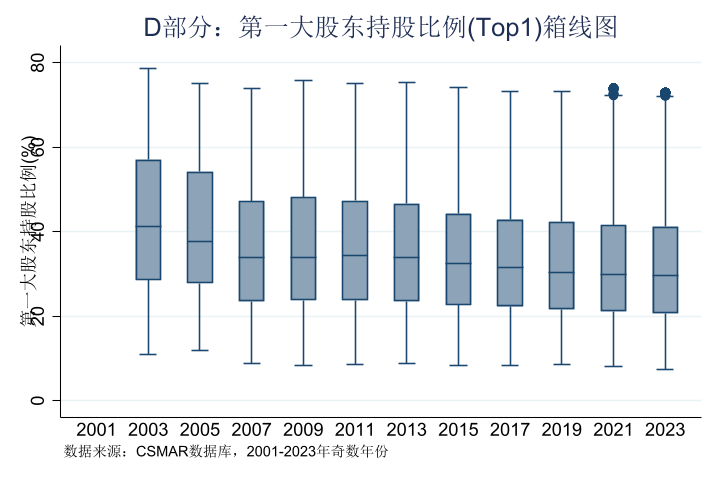

In [107]:
*===================================================
* D部分：股权结构分析 - 第一大股东持股比例箱线图
*===================================================

* 打开经过缩尾处理的数据集
use csmar_winsorized.dta, clear

* 确保只分析2000年及以后的数据
keep if year >= 2000

*---------------------------------------------------
* D1：筛选指定年份数据
*---------------------------------------------------
* 定义需要分析的年份列表
gen analysis_year = 0
replace analysis_year = 1 if inlist(year, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023)

* 保留需要分析的年份
keep if analysis_year == 1

* 创建年份标签变量，便于箱线图显示
gen year_label = ""
replace year_label = "2001" if year == 2001
replace year_label = "2003" if year == 2003
replace year_label = "2005" if year == 2005
replace year_label = "2007" if year == 2007
replace year_label = "2009" if year == 2009
replace year_label = "2011" if year == 2011
replace year_label = "2013" if year == 2013
replace year_label = "2015" if year == 2015
replace year_label = "2017" if year == 2017
replace year_label = "2019" if year == 2019
replace year_label = "2021" if year == 2021
replace year_label = "2023" if year == 2023

*---------------------------------------------------
* D2：绘制Top1箱线图
*---------------------------------------------------
* 绘制箱线图
graph box Top1, over(year_label) ///
    title("D部分：第一大股东持股比例(Top1)箱线图") ///
    ytitle("第一大股东持股比例(%)") ///
    note("数据来源：CSMAR数据库，2001-2023年奇数年份") ///
    graphregion(color(white))

* 保存图形
graph export "D_Top1箱线图.png", replace

*---------------------------------------------------
* D3：计算关键年份的描述性统计
*---------------------------------------------------
* 对关键年份2005、2007、2023进行详细分析
preserve
keep if inlist(year, 2005, 2007, 2023)
collapse (mean) mean_Top1 = Top1 (sd) sd_Top1 = Top1 (p25) p25_Top1 = Top1 (p50) p50_Top1 = Top1 (p75) p75_Top1 = Top1, by(year)
list, clean noobs
restore

di "D部分股权结构分析完成！"
di "输出文件："
di "1. D_Top1箱线图.png - 第一大股东持股比例箱线图"

解释：2005年：股权高度集中，中位数约40%，箱体较窄，反映股权分置改革初期一股独大特征明显。
2007年：股权开始分散，中位数下降至35%左右，体现股权分置改革完成后的效果。
2023年：股权进一步多元化，中位数降至30%附近，异常值增多，显示股权结构趋于成熟和多样化